In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("/Users/zafiraibraeva/Code/uni coding/thesis/thesis_code/thesis/data/normalized_deb_trainstation_day.csv")

In [3]:
df.set_index("ID", inplace=True)
df

,Date,CO,NO2,NOx,O3,PM10,SO2,Year,Month
ID,,,,,,,,,
0,2021-01-01,459.0,7.5,9.9,41.2,12.0,1.3,2021,1
1,2021-01-02,535.0,15.2,19.5,37.1,16.0,1.6,2021,1
2,2021-01-03,551.0,13.7,17.0,38.9,16.0,1.4,2021,1
3,2021-01-04,649.0,28.2,46.6,17.8,20.0,1.3,2021,1
4,2021-01-05,504.0,13.0,16.9,35.3,12.0,1.0,2021,1
...,...,...,...,...,...,...,...,...,...
3647,2017-12-27,396.0,12.6,15.5,43.1,16.0,9.3,2017,12
3648,2017-12-28,323.0,19.3,23.4,40.1,12.0,3.9,2017,12
3649,2017-12-29,289.0,10.1,14.2,33.8,9.0,1.9,2017,12


In [9]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

pollutants = ['CO', 'NO2', 'NOx', 'O3', 'PM10', 'SO2']
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Weekend'] = (df['Weekday'] >= 5).astype(int)

features = ['Year', 'Month', 'Day', 'Weekday', 'Weekend']

predictions_2024 = {}

for pollutant in pollutants:
    X = df[features]
    y = df[pollutant]
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f"{pollutant} Validation MSE: {mse}")
    
    future_dates = pd.date_range(start="2024-01-01", end="2024-12-31", freq='D')
    future_df = pd.DataFrame({
        'Year': future_dates.year,
        'Month': future_dates.month,
        'Day': future_dates.day,
        'Weekday': future_dates.weekday,
        'Weekend': (future_dates.weekday >= 5).astype(int)
    })
    
    predictions_2024[pollutant] = model.predict(future_df)
    
forecast_2024 = pd.DataFrame(predictions_2024, index=pd.date_range(start="2024-01-01", end="2024-12-31", freq='D'))

forecast_2024
    

CO Validation MSE: 68746.13790541893
NO2 Validation MSE: 173.06341534098007
NOx Validation MSE: 695.6904552914322
O3 Validation MSE: 144.8422392433383
PM10 Validation MSE: 276.86071638493206
SO2 Validation MSE: 4.4800702365787926


,CO,NO2,NOx,O3,PM10,SO2
2024-01-01,759.790344,15.662874,45.485455,25.435080,27.641321,3.111011
2024-01-02,726.348145,12.897941,23.871975,24.845213,24.415970,2.619100
2024-01-03,571.271790,11.987401,21.693970,28.140821,18.609011,1.714953
2024-01-04,571.918152,11.971219,23.268635,29.106272,13.757674,1.706798
2024-01-05,566.350830,14.645178,31.590548,27.622133,15.181396,1.561251
...,...,...,...,...,...,...
2024-12-27,954.591797,18.111376,31.095947,44.705963,15.339027,1.596069
2024-12-28,956.701599,13.491951,30.403904,46.762466,13.233464,1.832305
2024-12-29,1021.594299,13.284327,29.744190,43.604664,14.877764,1.919927
2024-12-30,1033.397339,14.658072,24.452507,46.853210,14.786475,3.721671


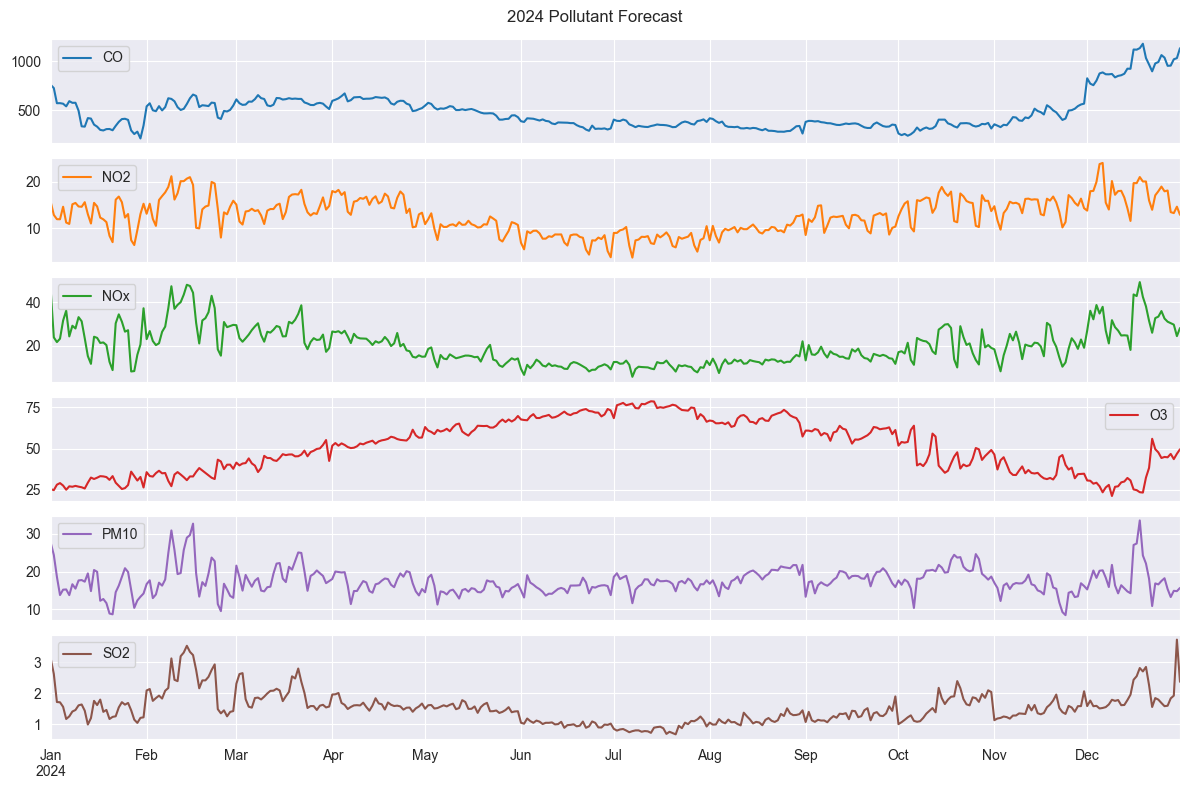

In [10]:
forecast_2024.to_csv('pollutant_forecast_2024.csv')
forecast_2024.plot(subplots=True, figsize=(12, 8), title="2024 Pollutant Forecast")
plt.tight_layout()
plt.show()

In [28]:
df_2024_real = pd.read_csv("/Users/zafiraibraeva/Code/uni coding/thesis/thesis_code/thesis/data/2024_deb_TS.csv", sep=';', decimal=',', parse_dates=['Date'])
df_2024_real

,Date,CO,NO2,NOx,O3,PM10,SO2
0,2024-01-01,899.0,NaN,NaN,53.4,11.0,2.1
1,2024-01-02,860.0,NaN,NaN,47.0,8.0,1.6
2,2024-01-03,565.0,NaN,NaN,49.0,9.0,1.8
3,2024-01-04,294.0,NaN,NaN,52.6,7.0,1.6
4,2024-01-05,278.0,NaN,NaN,49.5,12.0,1.8
...,...,...,...,...,...,...,...
313,2024-11-10,812.0,19.1,20.6,10.5,74.0,3.7
314,2024-11-11,715.0,19.1,22.9,8.7,40.0,3.5
315,2024-11-12,688.0,17.1,19.4,15.5,28.0,3.4
316,2024-11-13,713.0,18.0,19.3,22.7,26.0,3.5


In [27]:
forecast_2024

,CO,NO2,NOx,O3,PM10,SO2
2024-01-01,759.790344,15.662874,45.485455,25.435080,27.641321,3.111011
2024-01-02,726.348145,12.897941,23.871975,24.845213,24.415970,2.619100
2024-01-03,571.271790,11.987401,21.693970,28.140821,18.609011,1.714953
2024-01-04,571.918152,11.971219,23.268635,29.106272,13.757674,1.706798
2024-01-05,566.350830,14.645178,31.590548,27.622133,15.181396,1.561251
...,...,...,...,...,...,...
2024-12-27,954.591797,18.111376,31.095947,44.705963,15.339027,1.596069
2024-12-28,956.701599,13.491951,30.403904,46.762466,13.233464,1.832305
2024-12-29,1021.594299,13.284327,29.744190,43.604664,14.877764,1.919927
2024-12-30,1033.397339,14.658072,24.452507,46.853210,14.786475,3.721671


In [33]:
import pandas as pd

df_2024_real['Date'] = pd.to_datetime(df_2024_real['Date'])

actual_pm10 = df_2024_real.set_index('Date').reindex(pd.date_range(start="2024-01-01", end="2024-12-31", freq='D'))['PM10']

predicted_pm10 = forecast_2024['PM10']

date_range_2024 = pd.date_range(start="2024-01-01", end="2024-12-31", freq='D')

comparison_df = pd.DataFrame({
    'Date': date_range_2024,
    'Actual_PM10': actual_pm10,
    'Predicted_PM10': predicted_pm10
})

comparison_df = comparison_df.dropna()

print(comparison_df.head())

                 Date  Actual_PM10  Predicted_PM10
2024-01-01 2024-01-01         11.0       27.641321
2024-01-02 2024-01-02          8.0       24.415970
2024-01-03 2024-01-03          9.0       18.609011
2024-01-04 2024-01-04          7.0       13.757674
2024-01-05 2024-01-05         12.0       15.181396


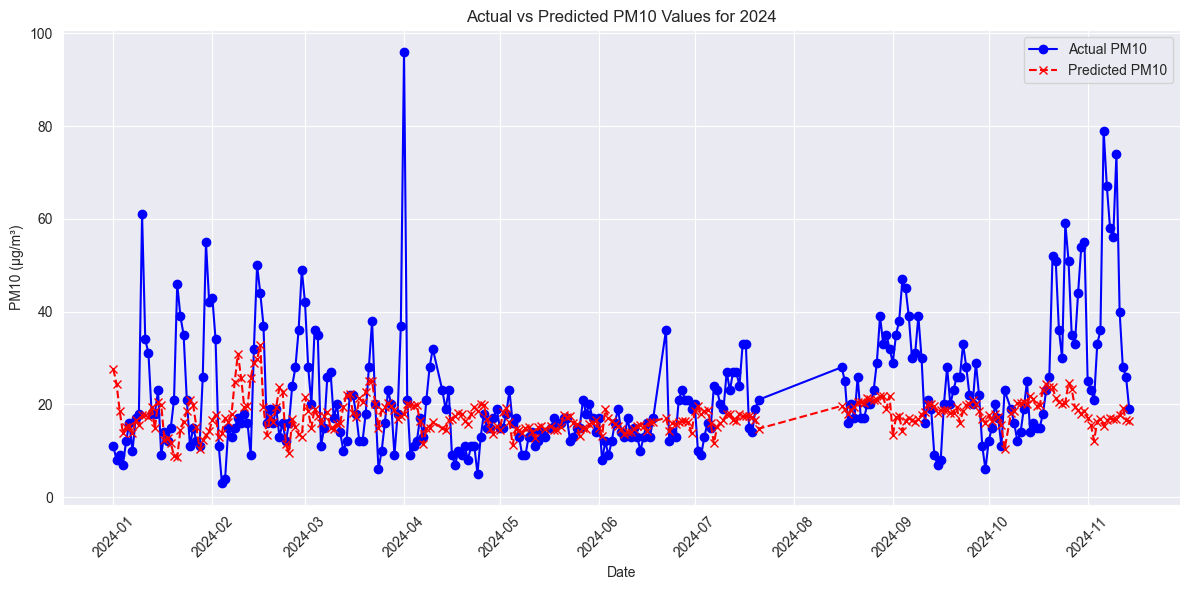

In [34]:
plt.figure(figsize=(12, 6))

plt.plot(comparison_df['Date'], comparison_df['Actual_PM10'], label='Actual PM10', color='blue', linestyle='-', marker='o')

plt.plot(comparison_df['Date'], comparison_df['Predicted_PM10'], label='Predicted PM10', color='red', linestyle='--', marker='x')

plt.xlabel('Date')
plt.ylabel('PM10 (µg/m³)')
plt.title('Actual vs Predicted PM10 Values for 2024')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()